In [192]:
%pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=d2ecb045b10d8e6b1db217b01eb89cb008329bfa0583b1eb52efd181b62a3745
  Stored in directory: /Users/marianaforero/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [540]:
# import necessary libraries
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)

from langdetect import detect

import unicodedata, string
from nltk.stem import SnowballStemmer


SEED=42

In [541]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

In [621]:
# cargar los datos
df_original = pd.read_csv('data/tipo1_entrenamiento_estudiantes.csv')

# Entendimiento

In [510]:
df_original.shape

(7875, 2)

In [454]:
df_original.sample(5)

,Review,Class
1701,"Viajamos con mi esposa, la estadía espectacular, el personal muy atento comandado por Gilberto, un administrador que mantiene todo a punto. Volveremos a la mayor brevedad. Recomendado para el descanso",5
5485,"Tenía muchas expectativas de visitar el museo. La verdad, qué gran decepción. La museografía me pareció terrible. La iluminación de las piezas muy mal diseñada y los textos puestos en las vitrinas son ilegibles ya que están presentados a una altura muy baja, obligando al visitante a agacharse por completo. Mucho edificio y poco contenido. Eso sí, una placa gigantesca a la entrada conmemorando al encargado de haber inaugurado el “magno” edificio.",2
3238,"Una vez pasado el concepto de una mexicana-restaurante libanés Eddie es un montón de diversión. Lugar local cerca de Paradise Village, con asientos en su mayoría al aire libre. Es muy popular, pero incluso sin reserva sólo teníamos una mínima esperar. Muy buena margarita's. Hay música en vivo y Eddie es un anfitrión sociable. Él también era que ofrece el mejor dollar a la conversión de pesos que hemos encontrado. También está abierto para el desayuno y el almuerzo. Wifi gratuito. Recomendar",4
623,"Muy bonita la instalación y parque aledaño a la rueda de la fortuna, muy buen precio ($30 por persona), el servicio de la gente que tiende es muy bueno, la góndola muy bonita, solo que te subes y no ves nada mas que techos de centros comerciales y una avenida. Cholula se ve lejisimos y el centro también.",3
7287,La vista desde Monserrate fue espectacular. Nos tomamos el teleférico que te permite vistas de la ciudad desde elevaciones diferentes. Fue una experiencia increíble.,5


In [437]:
df_original.isnull().sum()

Review    0
Class     0
dtype: int64

No hay registros nulos, los datos son completos.

<Axes: xlabel='Class'>

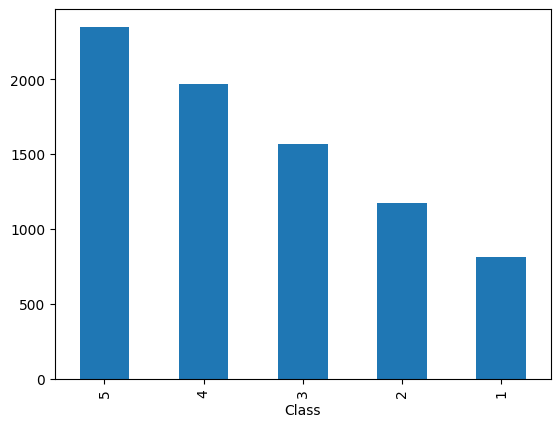

In [365]:
# distribución de variable objetivo
df_original['Class'].value_counts().plot(kind='bar')

Todos los valores de la columna 'Class' son válidos.

In [366]:
df_original.duplicated().sum()

71

Hay 71 registro duplicados, estos se deben eliminar del dataset.

In [367]:
duplicated_rows = df_original[df_original.duplicated()]
duplicated_rows


,Review,Class
518,"La ubicación es muy buena, al igual que la vista, la playa contrario a lo que esperaba resultó que estaba bastante limpia.\nSe percibe el sabor y la frescura en los insumos de los alimentos , lo cual es parte de la experiencia que ofrece...el lugar ya que tienen sus propias granjas productoras. La carta es limitada ( lo cual en mi caso prefiero, ya que se nota el esmero en cada uno de los platos que preparan), los precios están por arriba del promedio de otros restaurantes cercanos pero no llegan a ser exagerados, desconozco si eso se debió a que solo se tenía un salón disponible, ya que en la fecha que lo visité, el resto del restaurante se encontraba en remodelación (es la único razón por lo cual no otorgo la evaluación más alta), mi sugerencia sería que siguieran manteniendo los precios ya que los hace muy competitivos … sin duda regresaría, es un lugar que debes visitar en Veracruz sobre todo si eres fanático del buen comer…Más",4
1112,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
1605,"Cierran a las 3 pm, cobraron $85 adultos y niños (por lo menos los de 2 años) y adulto mayor gratis. A la entrada hay guías. Se juntan grupos de mínimo 10 personas y te cobran $70 por persona o $700 a quien se los pague. Excelente explicación y atención de parte de ellos. Poca claridad de información en redes, y el número telefónico no sirve. Llegamos fácilmente con waze. Lleven buen bloqueador, sombrero y de preferencia tenis.",3
1843,"Acudimos un sábado 2 de julio a las 11:15 de la mañana. Estuvimos esperando más de media hora nosotros dos y otro grupo de cuatro personas fuera, porque la camarera estaba dentro. Nos vio como estábamos esperando y no fue capaz de salir a atendernos...o dar alguna explicación si el bar estaba abierto o cerrado.\n\nNos tuvimos que marcharMás",1
1851,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
...,...,...
7520,"Un lugar muy limpio ordenado hermoso con áreas amplias que vale la pena disfrutar en familia un momento, primera vez que lo visito pero vale la pena acudir.",3
7601,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
7756,Deben de actualizar los horarios en las diferentes páginas ya que como yo o cualquiera de los visitantes que vamos podemos llegar y encontrar cerrado y luego la página para buscar información no funciona.,3
7794,"Wow Había escuchado muchas recomendaciones de este lugar, pero nunca había ido, hace unos fui y me precio muy interesante toda las historias que hay en este museo.",5


# Procesamiento y Preparación

In [622]:
# eliminar las filas duplicadas
df_prep = df_original.drop_duplicates()

In [623]:
df_prep.shape

(7804, 2)

In [624]:
# elimnar filas con texto en otros idiomas
def detect_language(text):
    try:
        language = detect(text)
        return language == 'es'  # Check if language is Spanish
    except:
        return False

In [625]:
df_prep = df_prep[df_prep['Review'].apply(detect_language)]
df_prep.shape

(7798, 2)

## Divisón en entrenamiento y prueba 

In [626]:
X_train, X_test, y_train, y_test = train_test_split(df_prep["Review"], df_prep["Class"], test_size = 0.3, stratify = df_prep["Class"], random_state = SEED)

In [627]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5458,), (2340,), (5458,), (2340,))

## Tokenización / Vectorización

"Feature engineering"

* Bag of Words / Count Tokenizer
* Tf-IDF

In [628]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marianaforero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marianaforero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [629]:
stop_words = set(stopwords.words('spanish'))

In [631]:
def tokenize_text(text):
    # convertir a minúsculas
    text = text.lower()
    
    # eliminar caracteres numericos
    text = re.sub(r'\d+', '', text) 

    # eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # eliminar caracters especiales
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons TODO: not all emojis included here
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)

    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  
     
    tokens = word_tokenize(text)

    # eliminar las stopwords
    tokens = [t for t in tokens if t not in stop_words]

    # eliminar los stems de las palabras
    stemmer = SnowballStemmer('spanish')
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

In [632]:
bow_vectorizer = CountVectorizer( tokenizer=tokenize_text)
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_text)

In [633]:
X_train_bow = bow_vectorizer.fit_transform(X_train)

/Users/marianaforero/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [420]:
len(bow_vectorizer.vocabulary_)

12582

In [634]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [246]:
len(tfidf_vectorizer.vocabulary_)

12516

In [524]:
df_bow_sklearn = pd.DataFrame(X_train_bow.toarray(),columns=bow_vectorizer.get_feature_names_out())
df_bow_sklearn

,...,......,8,aa,aaaaa,aaaah,ab,abad,abaj,abajol,...,zoo,zoofari,zoolog,zorr,zotan,zuegly,zul,zum,zumb,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [589]:
df_tfidf_sklearn = pd.DataFrame(X_train_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_sklearn

,...,......,8,aa,aaaaa,aaaah,ab,abad,abaj,abajol,...,zonassi,zoo,zoofari,zoolog,zorr,zotan,zuegly,zul,zum,zumb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Entrenamiento y evaluación de modelos

## Regresion Logistica

Desarrollado por: Mariana Forero

### Bag of words

In [636]:
# Train the logistic regression model
bow_model = LogisticRegression(multi_class='multinomial', max_iter=1000)  # Increase max_iter for convergence
bow_model.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [637]:
x_test_bow=bow_vectorizer.transform(X_test)

In [638]:
y_pred_bow = bow_model.predict(x_test_bow)
y_predT_bow=bow_model.predict(X_train_bow)

#### Analisis Cuantitativo

In [639]:
# Calculo Precision
accuracy = accuracy_score(y_test, y_pred_bow)
print("Accuracy:", accuracy)

Accuracy: 0.45427350427350427


In [640]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_predT_bow)
print("Accuracy:", accuracy)

Accuracy: 0.9785635764016123


La precision del modelo utilizando los datos de train es mucho mayor a la presicion  obtenida con los datos de test por lo que el modelo podria tener overfitting. 

In [641]:
# Other metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))


Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.42      0.46       236
           2       0.36      0.32      0.34       348
           3       0.34      0.32      0.33       465
           4       0.40      0.42      0.41       589
           5       0.59      0.65      0.62       702

    accuracy                           0.45      2340
   macro avg       0.44      0.43      0.43      2340
weighted avg       0.45      0.45      0.45      2340



In [642]:
print("F1:", f1_score(y_test, y_pred_bow, average='micro'))

F1: 0.45427350427350427


El F1 es bajo pero esto se debe a la naturaleza multinomial de la regresion utilizada. 

In [643]:
bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_coefficients = bow_model.coef_

In [644]:
# Print most influential words for each score
for i, score in enumerate(range(1, 6)):  # Scores range from 1 to 5
    print(f"Score {score}:")
    score_coefficients = bow_coefficients[i]
    sorted_indices = np.argsort(score_coefficients)
    top_words = [bow_feature_names[idx] for idx in sorted_indices[-10:]]  # Get top 10 words
    top_words.reverse()  # Reverse to get words with highest coefficients first
    print(top_words)

Score 1:
['pesim', 'peor', 'terribl', 'suci', 'horribl', 'cobr', 'grit', 'duch', 'emple', 'acuerd']
Score 2:
['decepcion', 'neg', 'desorganiz', 'agres', 'coctel', 'carril', 'mal', 'hamburgues', 'nadi', 'ventan']
Score 3:
['lent', 'canal', 'seis', 'febrer', 'trayect', 'mayor', 'infest', 'asist', 'normal', 'mencion']
Score 4:
['grat', 'figur', 'city', 'carec', 'reflej', 'den', 'arracher', 'conoci', 'dign', 'tunel']
Score 5:
['delici', 'excelent', 'padr', 'increibl', 'ampli', 'quer', 'recomend', 'acced', 'toqu', 'galeri']


Las palabras obtenidas para describir cada score tienen sentido ya describen lo que se esperaria de una review con ese puntaje. Por ejemplo para las puntuaciones mas bajas las palabras en general son cosas negativas como pesimo, terrible, sucio, mal, desorganizado, por mencionar algunas. Y para las puntuaciones mas altas las palabras son positivas como padre, increible, recomendado, excelente, entre otras. Aunque para el 4 hay palabras que no se asociarian normalmente a esa puntuacion pero puede ser que por los datos estudiados el modelo las haya asignado asi.

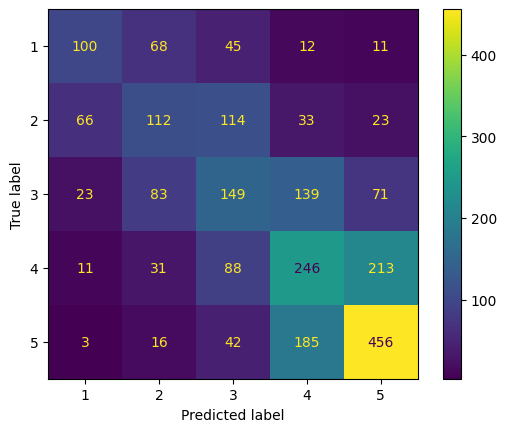

In [645]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bow)

La matriz de confusion mustras buenos resultados ya que en la diagonal hay una buena concentracion de casos de modod que el modelo esta clasificando buen la mayoria de las reviews, ademas aunque los casos cerca de la diagonal sean equivocados igual estan cerca del puntaje  correcto, por lo que no seria un error tan significativo como los pocos casos en los que ya hay un salt mayor entre el error clasificando una review negativa como positiva y viceversa. 

### Tf-IDF

In [646]:
# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [647]:
x_test_vec=tfidf_vectorizer.transform(X_test)

In [648]:
y_pred = model.predict(x_test_vec)
y_predT=model.predict(X_train_tfidf)

#### Analisis cuantitativo

In [649]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4846153846153846


In [650]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_predT)
print("Accuracy:", accuracy)

Accuracy: 0.7995602784902894


La precisión de la prediccion utilizando los datos de train sigue siendo mayor a la presicion  obtenida con los datos de test pero la diferencia es mucho menor.

In [651]:
# Other metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.33      0.41       236
           2       0.42      0.38      0.40       348
           3       0.38      0.34      0.36       465
           4       0.42      0.43      0.42       589
           5       0.59      0.73      0.65       702

    accuracy                           0.48      2340
   macro avg       0.47      0.44      0.45      2340
weighted avg       0.48      0.48      0.48      2340



In [652]:
print("F1:", f1_score(y_test, y_pred, average='micro'))

F1: 0.4846153846153846


Hay una mejora en el F1 del 3% en comparacion con bag of words.

In [653]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_

In [654]:
# Print most influential words for each score
for i, score in enumerate(range(1, 6)):  # Scores range from 1 to 5
    print(f"Score {score}:")
    score_coefficients = coefficients[i]
    sorted_indices = np.argsort(score_coefficients)
    top_words = [feature_names[idx] for idx in sorted_indices[-10:]]  # Get top 10 words
    top_words.reverse()  # Reverse to get words with highest coefficients first
    print(top_words)

Score 1:
['pesim', 'peor', 'mal', 'suci', 'terribl', 'horribl', 'cobr', 'dij', 'habi', 'duch']
Score 2:
['mal', 'decepcion', 'pobr', 'nadi', 'habit', 'descuid', 'suci', 'esper', 'asign', 'pareci']
Score 3:
['bastant', 'normal', 'aunqu', 'falt', 'embarg', 'men', 'demasi', 'elev', 'lent', 'mayor']
Score 4:
['buen', 'bien', 'comod', 'fresc', 'ciud', 'tunel', 'sencill', 'excelent', 'histori', 'antigu']
Score 5:
['excelent', 'delici', 'recomend', 'increibl', 'encant', 'atencion', 'hermos', 'maravill', 'perfect', 'ampli']


La mayoria de las palabras estan parecidas al ejemplo anterior pero las palabras en el puntaje 3 y 4 tienen mas sentido y estan mas de acorde a lo que se refiere esa clasificacion.

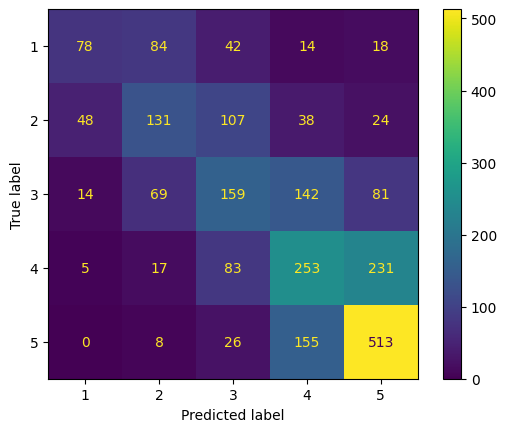

In [655]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

La matriz de confusion mustra que hay una mejora ya que la concentracion en las 3 diagonales del centro en mucho mayor a la matriz anterior

### Conclusiones

A pesar de que los scores F1 no son tan altos en ninguna de las 2 iteraciones al utilizar Tf-IDF se nota una mejora significativa y el bajo puntaje se puede explicar por la anturaliza multinomial del modelo utilizado. 

## [nombre algoritmo]

Desarrollado por:

[descripción]

### Conclusiones

## [nombre algoritmo]

Desarrollado por:

[descripción]

### Conclusiones

## Selección de final